# Relevant Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model_util.build_model import *

### Train each RNNs of basic ciphers for analysis

In [2]:
# Monociphers to train models on
cipher_list = [1, 1, 2, 2, 3, 3, 4, 4,  5, 5, 6, 6]
keys = [2, 5, 'tabz', 'timemachine', 5, 13, 'car', 'elephant', 'ball', 'multiverse', 100, 50]
epochs_list = [5, 10, 2, 10, 2, 2, 2,  2, 5, 5, 5, 5]
unit_list = [64, 64, 64, 64, 64, 64, 64, 64, 128, 64, 128, 256]

models = []
histories = []
word_accuracies = []
predictions = []
true_labels = []
num_models = len(cipher_list)
frac_words = (150000 / 370105)

In [4]:
# Train models on monociphered words
for i in range(num_models):
    print(f'Started training model {i + 1}')
    choice = (0, cipher_list[i])
    model, history, acc, prediction, true_label = build_and_train_model(choice, keys[i], frac_words = frac_words, epochs = epochs_list[i], units = unit_list[i], batch_size = 36)
    models.append(model)
    histories.append(history)
    word_accuracies.append(acc)
    predictions.append(prediction)
    true_labels.append(true_label)
    print('Finished training\n\n')


Started training model 1
Finished training


Started training model 2
Finished training


Started training model 3
Finished training


Started training model 4
Finished training


Started training model 5
Finished training


Started training model 6
Finished training


Started training model 7
Finished training


Started training model 8
Finished training


Started training model 9
Finished training


Started training model 10
Finished training


Started training model 11
Finished training


Started training model 12
Finished training




### Training Information

In [5]:
h_losses = []
h_accs = []
h_val_losses = []
h_val_accs = []
for h in histories:
    h_losses.append(h.history['loss'])
    h_accs.append(h.history['accuracy'])
    h_val_losses.append(h.history['val_loss'])
    h_val_accs.append(h.history['val_accuracy'])


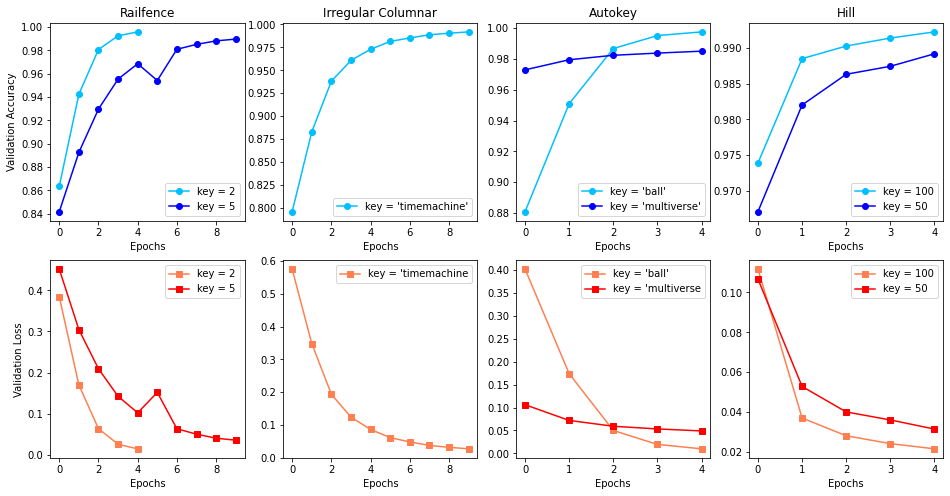

In [6]:
r, c = 2, 4
fig = plt.figure(figsize = (16, 8))

fig.add_subplot(r, c, 1)
plt.plot(h_val_accs[0], color = 'deepskyblue', label = 'key = 2', marker = 'o')
plt.plot(h_val_accs[1], color = 'blue', label = 'key = 5', marker = 'o')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title('Railfence')
plt.legend()

fig.add_subplot(r, c, 2)
plt.plot(h_val_accs[3], color = 'deepskyblue', label = "key = 'timemachine'", marker = 'o')
plt.xlabel('Epochs')
plt.title('Irregular Columnar')
plt.legend()

fig.add_subplot(r, c, 3)
plt.plot(h_val_accs[8], color = 'deepskyblue', label = "key = 'ball'", marker = 'o')
plt.plot(h_val_accs[9], color = 'blue', label = "key = 'multiverse'", marker = 'o')
plt.xlabel('Epochs')
plt.title('Autokey')
plt.legend()

fig.add_subplot(r, c, 4)
plt.plot(h_val_accs[10], color = 'deepskyblue', label = "key = 100", marker = 'o')
plt.plot(h_val_accs[11], color = 'blue', label = "key = 50", marker = 'o')
plt.xlabel('Epochs')
plt.title('Hill')
plt.legend()

# Losses
fig.add_subplot(r, c, 5)
plt.plot(h_val_losses[0], color = 'coral', label = 'key = 2', marker ='s')
plt.plot(h_val_losses[1], color = 'red', label = 'key = 5', marker ='s')
plt.ylabel('Validation Loss')
plt.xlabel('Epochs')
plt.legend()

fig.add_subplot(r, c, 6)
plt.plot(h_val_losses[3], color = 'coral', label = "key = 'timemachine", marker ='s')
plt.xlabel('Epochs')
plt.legend()

fig.add_subplot(r, c, 7)
plt.plot(h_val_losses[8], color = 'coral', label = "key = 'ball'", marker ='s')
plt.plot(h_val_losses[9], color = 'red', label = "key = 'multiverse", marker ='s')
plt.xlabel('Epochs')
plt.legend()

fig.add_subplot(r, c, 8)
plt.plot(h_val_losses[10], color = 'coral', label = 'key = 100', marker ='s')
plt.plot(h_val_losses[11], color = 'red', label = 'key = 50', marker ='s')
plt.xlabel('Epochs')
plt.legend()

plt.show()


### Performance on Test Data with Examples

In [16]:
# Word Accuracy
cipher = ['Railfence', 'Railfence', 'Irregular Columnar', 'Irregular Columnar', 'Caesar', 'Caesar', 'Beaufort', 'Beaufort', 'Autokey', 'Autokey', 'Hill', 'Hill']
print('Word Accuracy on Test Data:')
for i in range(len(cipher)):
    corrects = np.where(predictions[i] == true_labels[i])[0]
    correct_idx = np.random.choice(corrects)
    misses = np.where(predictions[i] != true_labels[i])[0]
    if len(misses) != 0:
        miss_idx = np.random.choice(misses)
    print(f'{cipher[i]} cipher with key = {keys[i]}: {(word_accuracies[i] * 100):.2f}%')
    print(f'Ex. of correct decryption: {predictions[i][correct_idx]}')
    if len(misses) != 0:
        print(f'Ex. of incorrect decryption: {predictions[i][miss_idx]}, True decryption: {true_labels[i][miss_idx]}', end = '\n\n')
    else:
        print()


Word Accuracy on Test Data:
Railfence cipher with key = 2: 91.81%
Ex. of correct decryption: diadoche
Ex. of incorrect decryption: nononjuruousness, True decryption: noninjuriousness

Railfence cipher with key = 5: 87.90%
Ex. of correct decryption: edulcoration
Ex. of incorrect decryption: nontathlleeianes, True decryption: nonintellectuals

Irregular Columnar cipher with key = tabz: 99.74%
Ex. of correct decryption: icositetrahedrons
Ex. of incorrect decryption: eae, True decryption: eau

Irregular Columnar cipher with key = timemachine: 84.40%
Ex. of correct decryption: unexternal
Ex. of incorrect decryption: spongien, True decryption: spongier

Caesar cipher with key = 5: 100.00%
Ex. of correct decryption: ohelo

Caesar cipher with key = 13: 100.00%
Ex. of correct decryption: icebergs

Beaufort cipher with key = car: 99.95%
Ex. of correct decryption: honeystucker
Ex. of incorrect decryption: ehpt, True decryption: eqpt

Beaufort cipher with key = elephant: 99.88%
Ex. of correct decr

### Train RNNs on Polyciphers

In [7]:
# Polyciphers to train models on
cipher_list = [1, 2, 3, 4, 5, 6]
keys = [['read', 'cakepie'], [100, 3], [35, 'magic'], ['amazing', 49], [5, 'for'], None]
epochs_list = [10, 10, 10, 10, 10, 10]
unit_list = [256, 256, 256, 256, 256, 256]

models = []
histories = []
word_accuracies = []
predictions = []
true_labels = []
num_models = len(cipher_list)

In [8]:
# Train models on polyciphered words
for i in range(num_models):
    print(f'Started training model {i + 1}')
    choice = (1, cipher_list[i])
    model, history, acc, prediction, true_label = build_and_train_model(choice, keys[i], frac_words = frac_words, epochs = epochs_list[i], units = unit_list[i], batch_size = 36)
    models.append(model)
    histories.append(history)
    word_accuracies.append(acc)
    predictions.append(prediction)
    true_labels.append(true_label)
    print('Finished training\n\n')

Started training model 1
Finished training


Started training model 2
Finished training


Started training model 3
Finished training


Started training model 4
Finished training


Started training model 5
Finished training


Started training model 6
Finished training




In [11]:
h_losses = []
h_accs = []
h_val_losses = []
h_val_accs = []
for h in histories:
    h_losses.append(h.history['loss'])
    h_accs.append(h.history['accuracy'])
    h_val_losses.append(h.history['val_loss'])
    h_val_accs.append(h.history['val_accuracy'])

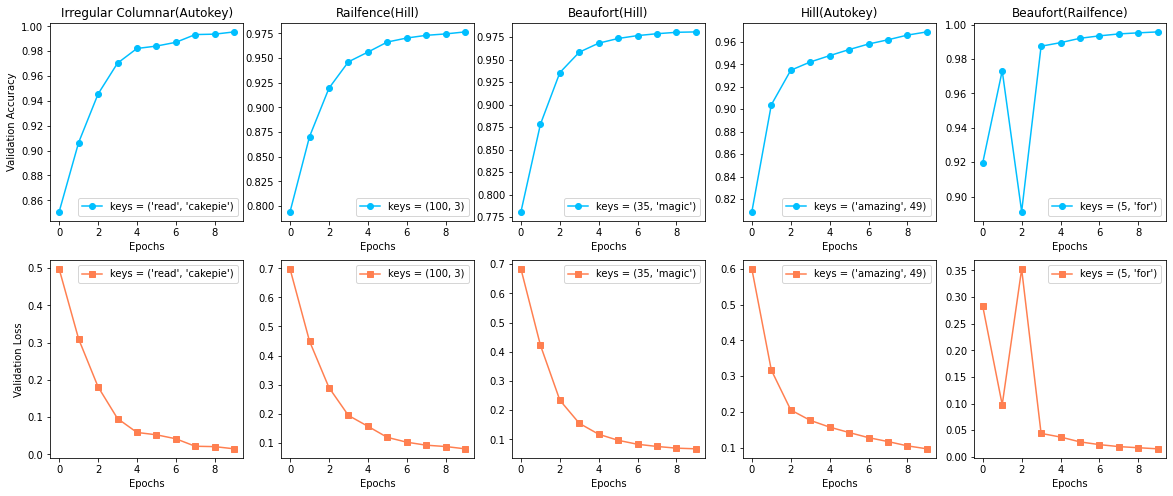

In [16]:
r, c = 2, 5
fig = plt.figure(figsize = (20, 8))

# first key is inside the composition
# Val Accuracy
fig.add_subplot(r, c, 1)
plt.plot(h_val_accs[0], color = 'deepskyblue', label = "keys = ('read', 'cakepie')", marker = 'o')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title('Irregular Columnar(Autokey)')
plt.legend()

fig.add_subplot(r, c, 2)
plt.plot(h_val_accs[1], color = 'deepskyblue', label = "keys = (100, 3)", marker = 'o')
plt.xlabel('Epochs')
plt.title('Railfence(Hill)')
plt.legend()

fig.add_subplot(r, c, 3)
plt.plot(h_val_accs[2], color = 'deepskyblue', label = "keys = (35, 'magic')", marker = 'o')
plt.xlabel('Epochs')
plt.title('Beaufort(Hill)')
plt.legend()

fig.add_subplot(r, c, 4)
plt.plot(h_val_accs[3], color = 'deepskyblue', label = "keys = ('amazing', 49)", marker = 'o')
plt.xlabel('Epochs')
plt.title('Hill(Autokey)')
plt.legend()

fig.add_subplot(r, c, 5)
plt.plot(h_val_accs[4], color = 'deepskyblue', label = "keys = (5, 'for')", marker = 'o')
plt.xlabel('Epochs')
plt.title('Beaufort(Railfence)')
plt.legend()

# Val Loss
fig.add_subplot(r, c, 6)
plt.plot(h_val_losses[0], color = 'coral', label = "keys = ('read', 'cakepie')", marker ='s')
plt.ylabel('Validation Loss')
plt.xlabel('Epochs')
plt.legend()

fig.add_subplot(r, c, 7)
plt.plot(h_val_losses[1], color = 'coral', label = "keys = (100, 3)", marker ='s')
plt.xlabel('Epochs')
plt.legend()

fig.add_subplot(r, c, 8)
plt.plot(h_val_losses[2], color = 'coral', label = "keys = (35, 'magic')", marker ='s')
plt.xlabel('Epochs')
plt.legend()

fig.add_subplot(r, c, 9)
plt.plot(h_val_losses[3], color = 'coral', label = "keys = ('amazing', 49)", marker ='s')
plt.xlabel('Epochs')
plt.legend()

fig.add_subplot(r, c, 10)
plt.plot(h_val_losses[4], color = 'coral', label = "keys = (5, 'for')", marker ='s')
plt.xlabel('Epochs')
plt.legend()

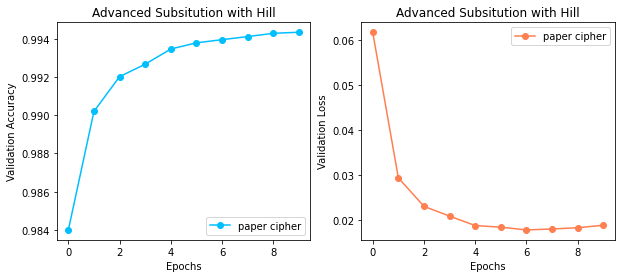

In [18]:
# Performance on paper cipher
r, c = 1, 2
fig = plt.figure(figsize = (10, 4))

# Val Accuracy
fig.add_subplot(r, c, 1)
plt.plot(h_val_accs[5], color = 'deepskyblue', label = 'paper cipher', marker = 'o')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title('Advanced Subsitution with Hill')
plt.legend(loc = 'lower right')

fig.add_subplot(r, c, 2)
plt.plot(h_val_losses[5], color = 'coral', label = 'paper cipher', marker = 'o')
plt.ylabel('Validation Loss')
plt.xlabel('Epochs')
plt.title('Advanced Subsitution with Hill')
plt.legend()

In [19]:
cipher = ['Irregular Columnar(Autokey)', 'Railfence(Hill)', 'Beaufort(Hill)', 'Hill(Autokey)', 'Beaufort(Railfence)', 'Advanced Substitution with Hill']
print('Word Accuracy on Test Data:')
for i in range(len(cipher)):
    corrects = np.where(predictions[i] == true_labels[i])[0]
    correct_idx = np.random.choice(corrects)
    misses = np.where(predictions[i] != true_labels[i])[0]
    if len(misses) != 0:
        miss_idx = np.random.choice(misses)
    print(f'{cipher[i]} cipher with key = {keys[i]}: {(word_accuracies[i] * 100):.2f}%')
    print(f'Ex. of correct decryption: {predictions[i][correct_idx]}')
    if len(misses) != 0:
        print(f'Ex. of incorrect decryption: {predictions[i][miss_idx]}, True decryption: {true_labels[i][miss_idx]}', end = '\n\n')
    else:
        print()

Word Accuracy on Test Data:
Irregular Columnar(Autokey) cipher with key = ['read', 'cakepie']: 89.86%
Ex. of correct decryption: endocrania
Ex. of incorrect decryption: nonempirwc, True decryption: nonempiric

Railfence(Hill) cipher with key = [100, 3]: 60.36%
Ex. of correct decryption: rashti
Ex. of incorrect decryption: torcor, True decryption: torpor

Beaufort(Hill) cipher with key = [35, 'magic']: 63.22%
Ex. of correct decryption: heterodoxical
Ex. of incorrect decryption: myebtropous, True decryption: laeotropous

Hill(Autokey) cipher with key = ['amazing', 49]: 57.66%
Ex. of correct decryption: cy
Ex. of incorrect decryption: supersensitioe, True decryption: supersensitise

Beaufort(Railfence) cipher with key = [5, 'for']: 94.76%
Ex. of correct decryption: subdiscoidal
Ex. of incorrect decryption: phhhaleine, True decryption: phthaleine

Advanced Substitution with Hill cipher with key = None: 85.86%
Ex. of correct decryption: eightieth
Ex. of incorrect decryption: phonopinematogr